In [1]:
import pandas as pd
import numpy as np
import matplotlib


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [59]:
data = pd.read_csv("./data_train.csv")

In [60]:
print(list(data.columns))
data.head()

['Unnamed: 0', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 'T', 'RH', 'AH']


,Unnamed: 0,PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,0,797.0,-200.0,2.1,593.0,146.0,1212.0,72.0,984.0,494.0,10.8,49.7,0.6429
1,1,1282.0,-200.0,11.0,1013.0,354.0,545.0,141.0,1384.0,1287.0,17.4,50.6,0.9989
2,2,891.0,-200.0,7.6,882.0,342.0,885.0,149.0,950.0,894.0,7.8,33.9,0.3594
3,3,1285.0,-200.0,18.1,1243.0,481.0,599.0,173.0,1815.0,1582.0,26.4,41.9,1.4237
4,4,892.0,-200.0,7.3,869.0,71.0,953.0,77.0,1363.0,632.0,37.4,14.7,0.9295


In [61]:
data.shape

(6250, 13)

In [62]:
pd.isnull(data).sum()

Unnamed: 0        0
PT08.S1(CO)      77
NMHC(GT)         77
C6H6(GT)         77
PT08.S2(NMHC)    77
NOx(GT)          77
PT08.S3(NOx)     77
NO2(GT)          77
PT08.S4(NO2)     77
PT08.S5(O3)      77
T                77
RH               77
AH               77
dtype: int64

In [63]:
data.dropna(inplace = True)
data.drop('Unnamed: 0',axis = 1,inplace=True)
print(data.shape)
orig_data = data

(6173, 12)


The data has 6173 Data entries each consisting of 12 varables (11 independent and 1 dependent)

In [64]:
data.reset_index(drop = True,inplace = True)
feature_table = data.drop('PT08.S1(CO)',axis = 1)
label = data['PT08.S1(CO)']

array([[<Axes: title={'center': 'PT08.S1(CO)'}>,
        <Axes: title={'center': 'NMHC(GT)'}>,
        <Axes: title={'center': 'C6H6(GT)'}>],
       [<Axes: title={'center': 'PT08.S2(NMHC)'}>,
        <Axes: title={'center': 'NOx(GT)'}>,
        <Axes: title={'center': 'PT08.S3(NOx)'}>],
       [<Axes: title={'center': 'NO2(GT)'}>,
        <Axes: title={'center': 'PT08.S4(NO2)'}>,
        <Axes: title={'center': 'PT08.S5(O3)'}>],
       [<Axes: title={'center': 'T'}>, <Axes: title={'center': 'RH'}>,
        <Axes: title={'center': 'AH'}>]], dtype=object)

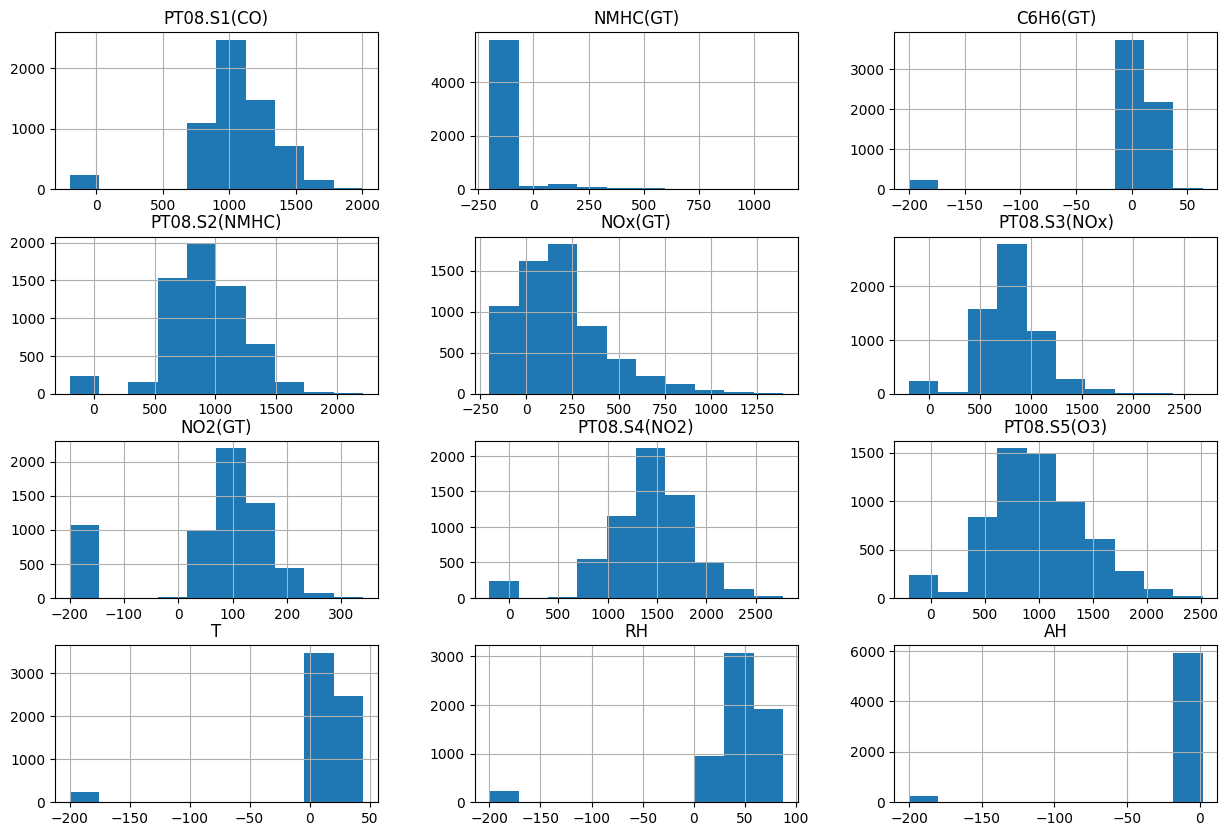

In [65]:
data.hist(figsize=(15,10))

Most features do not have normal distributions. There are definitely some outliers especially in the AH, T, RH, and NO2 columns (-200 range). Because of this transforming each feature to have a mean of 0 and standard deviation of 1 can allow the data to be a beter representative to the population as a whole.

array([[<Axes: title={'center': 'PT08.S1(CO)'}>,
        <Axes: title={'center': 'NMHC(GT)'}>,
        <Axes: title={'center': 'C6H6(GT)'}>],
       [<Axes: title={'center': 'PT08.S2(NMHC)'}>,
        <Axes: title={'center': 'NOx(GT)'}>,
        <Axes: title={'center': 'PT08.S3(NOx)'}>],
       [<Axes: title={'center': 'NO2(GT)'}>,
        <Axes: title={'center': 'PT08.S4(NO2)'}>,
        <Axes: title={'center': 'PT08.S5(O3)'}>],
       [<Axes: title={'center': 'T'}>, <Axes: title={'center': 'RH'}>,
        <Axes: title={'center': 'AH'}>]], dtype=object)

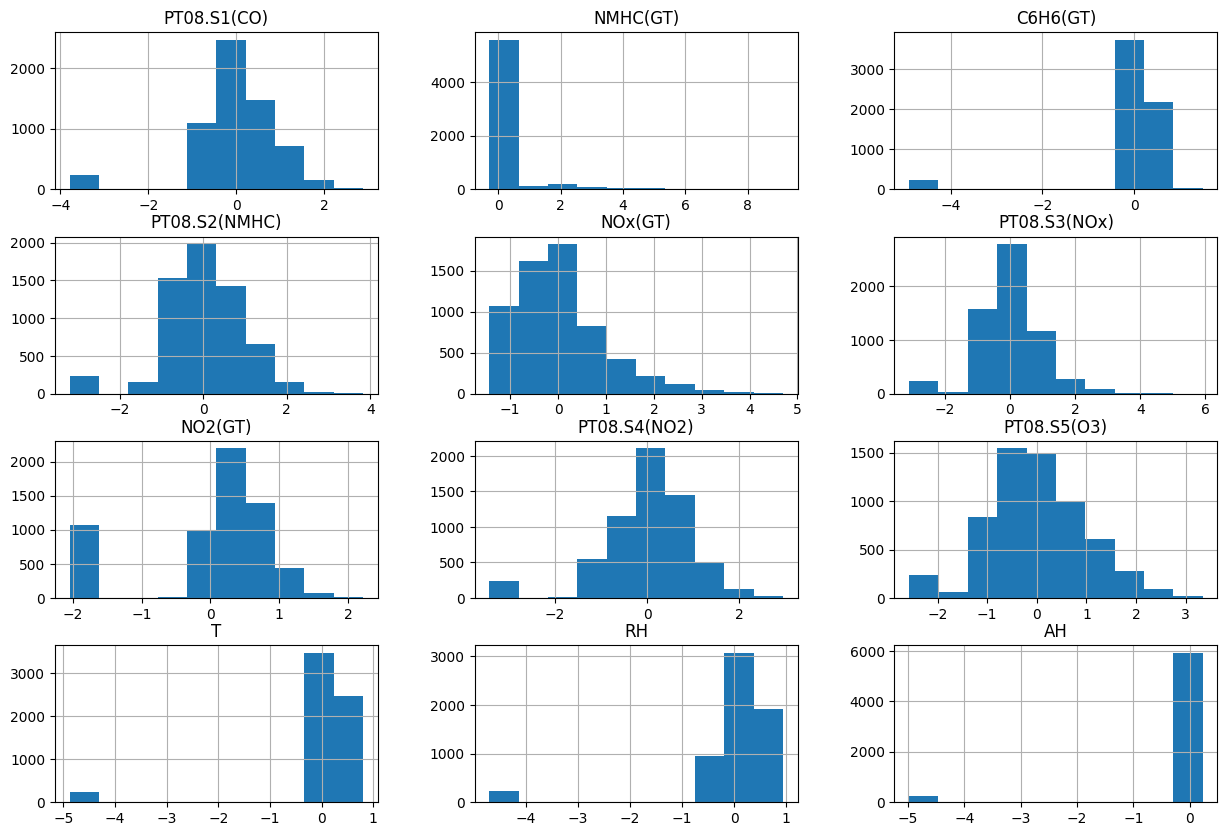

In [66]:
data = (data - data.mean())/data.std()
feature_table = data.drop('PT08.S1(CO)',axis = 1)
label = data['PT08.S1(CO)']
data.hist(figsize=(15,10))

<Axes: xlabel='PT08.S4(NO2)', ylabel='PT08.S5(O3)'>

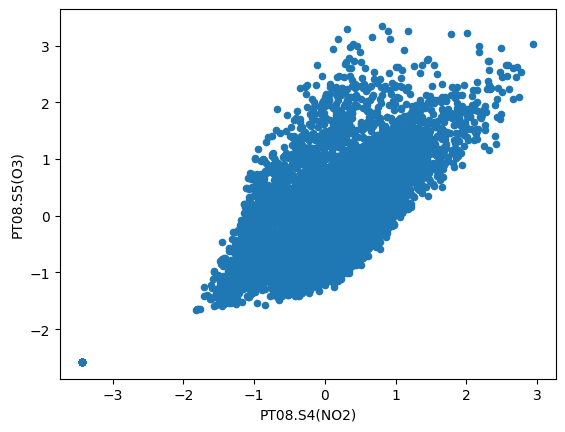

In [67]:
data.plot.scatter('PT08.S4(NO2)','PT08.S5(O3)')

These two features PT08 S4 and S5 have a fairly positive linear realationship and they have a fairly high corelation (0.724768)


In [68]:

correlations = feature_table.corr()
correlations

,NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
NMHC(GT),1.000000,0.033550,0.110095,-0.005564,0.042732,0.100077,0.160313,0.101689,-0.006122,0.005423,0.007512
C6H6(GT),0.033550,1.000000,0.767580,-0.004929,0.507535,-0.016032,0.776641,0.641102,0.970734,0.924211,0.984247
PT08.S2(NMHC),0.110095,0.767580,1.000000,0.336703,-0.079336,0.183522,0.875223,0.910187,0.666428,0.585272,0.645405
NOx(GT),-0.005564,-0.004929,0.336703,1.000000,-0.449574,0.816698,0.038484,0.468411,-0.145773,-0.058958,-0.102966
PT08.S3(NOx),0.042732,0.507535,-0.079336,-0.449574,1.000000,-0.270139,0.118450,-0.216485,0.586579,0.567827,0.618788
NO2(GT),0.100077,-0.016032,0.183522,0.816698,-0.270139,1.000000,-0.017168,0.262134,-0.092293,-0.090652,-0.069417
PT08.S4(NO2),0.160313,0.776641,0.875223,0.038484,0.118450,-0.017168,1.000000,0.724768,0.754736,0.641517,0.693155
PT08.S5(O3),0.101689,0.641102,0.910187,0.468411,-0.216485,0.262134,0.724768,1.000000,0.501053,0.523777,0.517822
T,-0.006122,0.970734,0.666428,-0.145773,0.586579,-0.092293,0.754736,0.501053,1.000000,0.884202,0.980895
RH,0.005423,0.924211,0.585272,-0.058958,0.567827,-0.090652,0.641517,0.523777,0.884202,1.000000,0.943258


<Axes: >

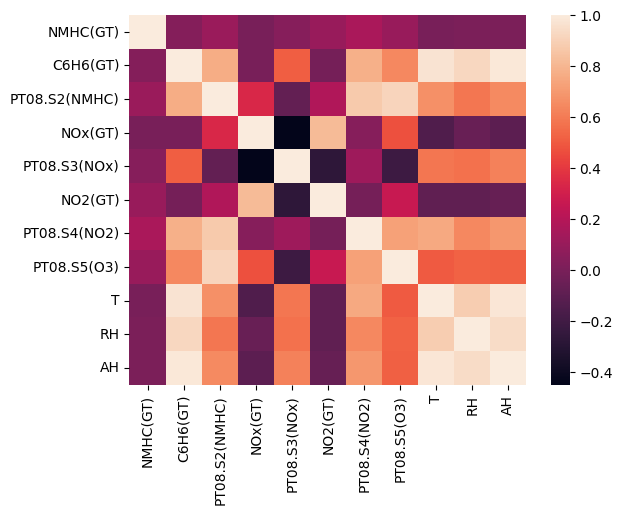

In [69]:
import seaborn as sb
sb.heatmap(correlations)

In [70]:

class LinearRegression:
  def __init__(self,learning_rate=0.01,iter=1000):
    '''
     The class constructor.
     params:
     learning_rate= the learning rate
     n_iters=number of iterations on gradient descent
    '''
    # initialize learning rate lr and number of iteration iters
    self.lr=learning_rate
    self.iters=iter
    # initialize the weights matrix
    self.weights=None

  def fit(self,X,y):
    '''
    Used to calculate the weights matrix of the linear regression model.
    :param X: array, features
    :param y: array, known labels
    :return: None
   '''
    n_samples=len(X)
    # modify x, add 1 column with value 1
    ones=np.ones(len(X))
    features=np.c_[ones,X]
    # initialize the weights matrix
    self.weights = np.zeros(features.shape[1])

    for i in range(self.iters):
      # predicted value
      y_hat = np.dot(features,self.weights.T)
      # calculate the error
      error = y_hat - y
      # compute the partial derivated of the cost function
      dw = (2 / n_samples) * np.dot(features.T,error)
      # update the weights matrix
      self.weights -= self.lr * dw

  def predict(self,X):
     '''
        Makes predictions

        :param X: array, features
        :return: array, predictions
     '''

     ones=np.ones(1)
     features=np.concatenate((ones,X),axis = None)

     y_predicted=np.dot(features,self.weights.T)
     return y_predicted

This is the linear regression class model to fit and predict from the data.

In [71]:
import math
def RSME(model, X, y):
    sum = 0.0

    n = len(y)
    y = y.to_numpy()
    #print(y)
    #print(X)
    #print(n,'\n')
    for i in range(n):
        #print(i,'\n')
        row = X.iloc[i].to_numpy()
        #print(row)
        #print(row,'\n')
        sum += math.pow(y[i]-model.predict(row),2) / n

    return math.sqrt(sum)

this calculates the RSME value by summing the square of the difference in actual vs predcted and then dividing it by the total number of data poits and taking the square root of it

In [104]:
split = int(feature_table.shape[0]/5.0)
rsme_vals = []
for i in range(5):
    lin_model = LinearRegression(learning_rate = 0.01, iter = 2000)
    X_validation = feature_table.iloc[(split*i):(split*(i+1))].reset_index().drop('index',axis=1)
    y_validation = label.iloc[(split*i):(split*(i+1))].reset_index().drop('index',axis=1)

    X_train = feature_table.drop(feature_table.index[split*i:(split*(i+1))]).to_numpy()

    y_train = label.drop(label.index[split*i:(split*(i+1))]).to_numpy()

    lin_model.fit(X_train,y_train)
    #print(model.weights,'\n')
    rsme_val = RSME(lin_model,X_validation,y_validation)
    rsme_vals.append(rsme_val)
    #print(rsme_val,'\n')
rsme_vals = np.array(rsme_vals)
print(rsme_vals,'\n')
print("average rsme val:",np.average(rsme_vals),'\n')
print("rsme vals standard deviation:",np.std(rsme_vals),'\n')

<ipython-input-71-29e6a051316a>:15: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  sum += math.pow(y[i]-model.predict(row),2) / n
<ipython-input-71-29e6a051316a>:15: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  sum += math.pow(y[i]-model.predict(row),2) / n
<ipython-input-71-29e6a051316a>:15: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  sum += math.pow(y[i]-model.predict(row),2) / n
<ipython-input-71-29e6a051316a>:15: DeprecationWarning: Conversion of an array wit

[0.21419119 0.22029427 0.20726126 0.2205913  0.22302754] 

average rsme val: 0.21707311265369236 

rsme vals standard deviation: 0.0057059021256998625 



<ipython-input-71-29e6a051316a>:15: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  sum += math.pow(y[i]-model.predict(row),2) / n


There is not a large change across RSME values for the models (~0.02 range).

The coefficients that are relatively far from zero have a higher impact and more directly influece the prediction compared to the coefficients that are near zero.

In [93]:
import matplotlib.pyplot as plt
class LogisticRegressionClass:
  def __init__ (self, D = 2, lr = 0.1, lambda_param = 0.1, max_iter = 1000):
    self.lr           = lr
    self.w            = np.random.randn(D + 1, 1)
    self.max_iter     = max_iter
    self.lambda_param = lambda_param

  def fit(self, X, y):
    n          = X.shape[0]
    X_extended = np.concatenate([X, np.ones((n, 1))], axis=1)

    for i in range(self.max_iter):
      logits  = np.matmul(X_extended, self.w)
      grad    = (((1/(1+np.exp(-logits)))-y).dot(X_extended)).mean(axis=0, keepdims=True).T + 2 * self.lambda_param * self.w
      self.w -= self.lr * grad
      if i % 100 == 0:
        self.iter = i
        #self.plot(X, y, self.predict(X))

  def predict(self, X):
    X_extended = np.concatenate([X, np.ones((X.shape[0], 1))], axis=1)
    logits     = np.matmul(X_extended, self.w)
    return np.round(1/(1+np.exp(-logits)))


  def plot(self, X, y, preds = None):
    fig, ax = plt.subplots(1, 2, figsize=(15, 5))
    ax_gt, ax_pred = ax

    ax_gt.scatter(X[:, 0], X[:, 1], c = y)
    ax_gt.set_title('GROUND TRUTH')
    ax_pred.scatter(X[:, 0], X[:, 1], c = preds)
    ax_pred.set_title('PREDS')
    fig.suptitle(f"ITERATION: {self.iter}", fontsize=30)
    plt.show()


This is the logistic regression class and contains methods to fit the model, make predictions off the fitted model, and also plot the results.

In [74]:
def logistic_analysis(model,X,y):
    TP = 0.0
    TN = 0.0
    FP = 0.0
    FN = 0.0
    #print(X)
    #print(y)
    predictions = model.predict(X)
    for i in range(len(y)):
        row = X[i]
        pred = predictions[i]
        act = y[i]
        if pred == 1 and act == 1:
            TP += 1
        elif pred == 0 and act == 1:
            FN += 1
        elif pred == 1 and act == 0:
            FP += 1
        else:
            TN += 1

    print("TN:",TN)
    print("TP:",TP)
    print("FN:",FN)
    print("TP:",TP)

    results = {"Acuracy":(TP + TN)/(TP + TN + FP + FN),
               "F1":(2 * TP)/(2*TP + FP + FN)}
    if TP == 0 and FP == 0:
        results["Precision"] = np.nan
    else:
        results["Precision"] = (TP)/(TP+FP)
    if TN == 0 and FN == 0:
        results["Recall"] = np.nan
    else:
        results["Recall"] = (TP)/(TP+FN)
    return results

This code tallys the true/false positive/negative outcomes and then calculates precision, recall, Accuracy, and F1 score for the predictions provided in the arguments.

In [106]:
logis_y = np.where(orig_data['PT08.S1(CO)'] > 1000,1,0)

split = int(feature_table.shape[0]/5.0)
result_vals = []
for i in range(5):
    model = LogisticRegressionClass(D=11,max_iter=1000)
    X_validation = feature_table.iloc[(split*i):(split*(i+1))].reset_index().drop('index',axis=1).to_numpy()
    y_validation = logis_y[(split*i):(split*(i+1))]

    X_train = feature_table.drop(feature_table.index[split*i:(split*(i+1))]).to_numpy()
    X_train = (X_train-X_train.mean())/X_train.std()

    y_train = np.delete(logis_y,np.arange(split*i,split*(i+1),1))

    model.fit(X_train,y_train)
    results = logistic_analysis(model,X_validation,y_validation)
    result_vals = result_vals = [results]
    print(f"iteration {i}:",results)
    #print(model.weights,'\n')

Accuracy = []
Precision = []
Recall = []
F1 = []
for i in range(len(result_vals)):
    Accuracy += [result_vals[i]['Acuracy']]
    Precision += [result_vals[i]['Precision']]
    Recall += [result_vals[i]['Recall'] ]
    F1 += [result_vals[i]['F1'] ]

print("Accuracy Average:",np.average(Accuracy))
print("Accuracy Standard Deviation:",np.std(Accuracy))
print()
print("Precision Average:",np.average(Precision))
print("Precision Standard Deviation:",np.std(Precision))
print()
print("Recall Average:",np.average(Recall))
print("Recall Standard Deviation:",np.std(Recall))
print()
print("F1 Average:",np.average(F1))
print("F1 Standard Deviation:",np.std(F1))

<ipython-input-93-ee0e2c6078cb>:15: RuntimeWarning: overflow encountered in exp
  grad    = (((1/(1+np.exp(-logits)))-y).dot(X_extended)).mean(axis=0, keepdims=True).T + 2 * self.lambda_param * self.w
<ipython-input-93-ee0e2c6078cb>:24: RuntimeWarning: overflow encountered in exp
  return np.round(1/(1+np.exp(-logits)))
<ipython-input-93-ee0e2c6078cb>:15: RuntimeWarning: overflow encountered in exp
  grad    = (((1/(1+np.exp(-logits)))-y).dot(X_extended)).mean(axis=0, keepdims=True).T + 2 * self.lambda_param * self.w


TN: 475.0
TP: 614.0
FN: 108.0
TP: 614.0
iteration 0: {'Acuracy': 0.8824959481361426, 'F1': 0.8943918426802622, 'Precision': 0.9431643625192012, 'Recall': 0.850415512465374}


<ipython-input-93-ee0e2c6078cb>:24: RuntimeWarning: overflow encountered in exp
  return np.round(1/(1+np.exp(-logits)))
<ipython-input-93-ee0e2c6078cb>:15: RuntimeWarning: overflow encountered in exp
  grad    = (((1/(1+np.exp(-logits)))-y).dot(X_extended)).mean(axis=0, keepdims=True).T + 2 * self.lambda_param * self.w


TN: 453.0
TP: 650.0
FN: 102.0
TP: 650.0
iteration 1: {'Acuracy': 0.8938411669367909, 'F1': 0.9084556254367575, 'Precision': 0.9572901325478645, 'Recall': 0.8643617021276596}


<ipython-input-93-ee0e2c6078cb>:24: RuntimeWarning: overflow encountered in exp
  return np.round(1/(1+np.exp(-logits)))


TN: 460.0
TP: 611.0
FN: 129.0
TP: 611.0
iteration 2: {'Acuracy': 0.8679092382495948, 'F1': 0.8823104693140794, 'Precision': 0.9472868217054263, 'Recall': 0.8256756756756757}


<ipython-input-93-ee0e2c6078cb>:15: RuntimeWarning: overflow encountered in exp
  grad    = (((1/(1+np.exp(-logits)))-y).dot(X_extended)).mean(axis=0, keepdims=True).T + 2 * self.lambda_param * self.w
<ipython-input-93-ee0e2c6078cb>:24: RuntimeWarning: overflow encountered in exp
  return np.round(1/(1+np.exp(-logits)))
<ipython-input-93-ee0e2c6078cb>:15: RuntimeWarning: overflow encountered in exp
  grad    = (((1/(1+np.exp(-logits)))-y).dot(X_extended)).mean(axis=0, keepdims=True).T + 2 * self.lambda_param * self.w


TN: 443.0
TP: 622.0
FN: 131.0
TP: 622.0
iteration 3: {'Acuracy': 0.8630470016207455, 'F1': 0.8803963198867657, 'Precision': 0.9424242424242424, 'Recall': 0.8260292164674635}
TN: 428.0
TP: 651.0
FN: 108.0
TP: 651.0
iteration 4: {'Acuracy': 0.8743922204213939, 'F1': 0.8936170212765957, 'Precision': 0.9326647564469914, 'Recall': 0.857707509881423}
Accuracy Average: 0.8743922204213939
Accuracy Standard Deviation: 0.0

Precision Average: 0.9326647564469914
Precision Standard Deviation: 0.0

Recall Average: 0.857707509881423
Recall Standard Deviation: 0.0

F1 Average: 0.8936170212765957
F1 Standard Deviation: 0.0


<ipython-input-93-ee0e2c6078cb>:24: RuntimeWarning: overflow encountered in exp
  return np.round(1/(1+np.exp(-logits)))


The metrics dont change much across each fold with each having a standard deviation around .004

(array([0.        , 0.        , 0.        , 0.00195312, 0.00195312,
       0.00390625, 0.00390625, 0.0078125 , 0.0078125 , 0.00976562,
       0.00976562, 0.01171875, 0.01171875, 0.01367188, 0.01367188,
       0.015625  , 0.015625  , 0.01757812, 0.01757812, 0.01953125,
       0.01953125, 0.02148438, 0.02148438, 0.0234375 , 0.0234375 ,
       0.02539062, 0.02539062, 0.02929688, 0.02929688, 0.03125   ,
       0.03125   , 0.03515625, 0.03515625, 0.03710938, 0.03710938,
       0.0390625 , 0.0390625 , 0.04101562, 0.04101562, 0.04296875,
       0.04296875, 0.04492188, 0.04492188, 0.04882812, 0.04882812,
       0.0546875 , 0.0546875 , 0.05664062, 0.05664062, 0.05859375,
       0.05859375, 0.06445312, 0.06445312, 0.06640625, 0.06640625,
       0.0703125 , 0.0703125 , 0.07226562, 0.07226562, 0.08007812,
       0.08007812, 0.08203125, 0.08203125, 0.08398438, 0.08398438,
       0.09179688, 0.09179688, 0.09375   , 0.09375   , 0.09765625,
       0.09765625, 0.09960938, 0.09960938, 0.10742188, 0.1074

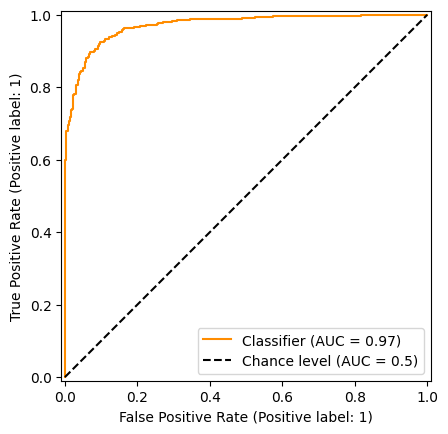

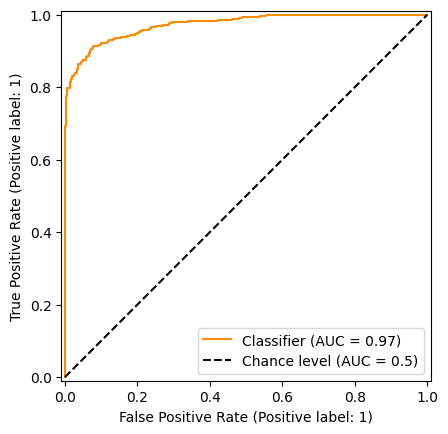

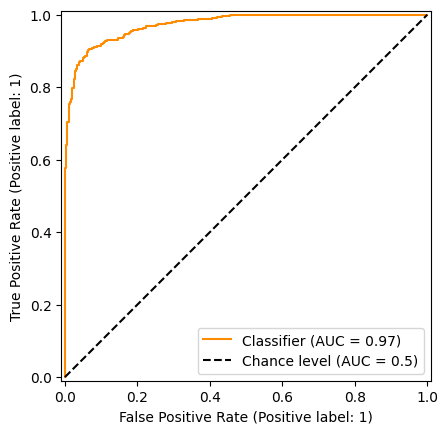

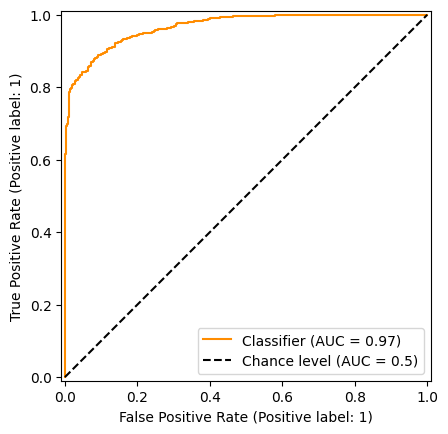

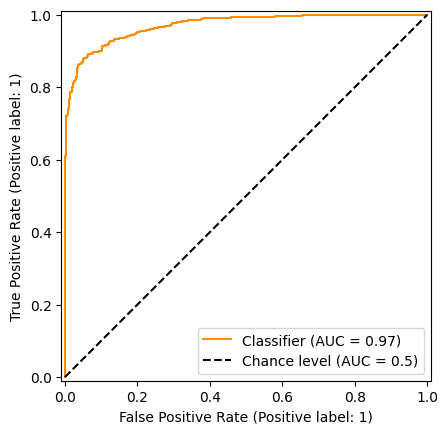

In [92]:
from sklearn.linear_model import LogisticRegression as Log_Reg
from sklearn.metrics import roc_curve,roc_auc_score,RocCurveDisplay

split = int(feature_table.shape[0]/5.0)
rsme_vals = []
for i in range(5):

    X_validation = feature_table.iloc[(split*i):(split*(i+1))].reset_index().drop('index',axis=1).to_numpy()
    y_validation = logis_y[(split*i):(split*(i+1))]

    X_train = feature_table.drop(feature_table.index[split*i:(split*(i+1))]).to_numpy()
    X_train = (X_train-X_train.mean())/X_train.std()

    y_train = np.delete(logis_y,np.arange(split*i,split*(i+1),1))

    model = Log_Reg(random_state=0).fit(X_train,y_train)
    scores = []
    score = model.predict_proba(X_validation)
    #print(score)
    scores += np.array(score).T[1].tolist()

    print(roc_curve(y_validation,scores))

    display = RocCurveDisplay.from_predictions(
        y_validation,
        scores,
        color="darkorange",
        plot_chance_level=True,
    )

    #print(model.weights,'\n')

This result is fairly consistent with the results I obtained however the sklearn model does have a higher acuracy than my model by about ~10%

In [107]:
test_data = pd.read_csv("./data_test.csv")
test_data.dropna(inplace=True)
test_data.drop('Unnamed: 0',axis = 1,inplace=True)
test_data.reset_index().drop('index',axis=1)
test_data = (test_data - feature_table.mean()) / feature_table.std()
test_data.head()

,NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,-200.0,8.0,898.0,122.0,933.0,105.0,1594.0,1098.0,17.0,51.7,0.9914
1,-200.0,19.4,1281.0,-200.0,774.0,-200.0,1952.0,1324.0,20.8,43.6,1.0614
2,-200.0,9.9,975.0,349.0,638.0,223.0,1243.0,1064.0,5.6,74.6,0.6826
3,-200.0,12.7,1075.0,103.0,749.0,98.0,1690.0,1022.0,31.7,21.5,0.9902
4,-200.0,2.9,647.0,131.0,1054.0,85.0,962.0,828.0,8.4,54.5,0.6022


In [110]:
log_pred = model.predict(test_data)
lin_pred = []
for i in range(test_data.shape[0]):
    lin_pred.append(lin_model.predict(test_data.iloc[i]))
lin_pred = np.array(lin_pred).T
with open("./preds.csv",'w') as file:
    file.write("pred_linear,pred_logistic\n")
    for i in range(len(lin_pred)):
        file.write(f"{lin_pred[i]},{log_pred[i][0]}\n")

<ipython-input-93-ee0e2c6078cb>:24: RuntimeWarning: overflow encountered in exp
  return np.round(1/(1+np.exp(-logits)))
